In [1]:
import IPython.display as ipd

In [2]:
ipd.Audio('Base.wav') 

In [3]:
ipd.Audio('Grito.wav') 

In [11]:
import librosa as lr
import librosa.display
import matplotlib.pyplot as plt

In [55]:
audio='arabic6'
y, sr = lr.load('Grito.wav'.format(audio))
duration = lr.get_duration(y=y, sr=sr)
y_fast = lr.effects.time_stretch(y, duration)

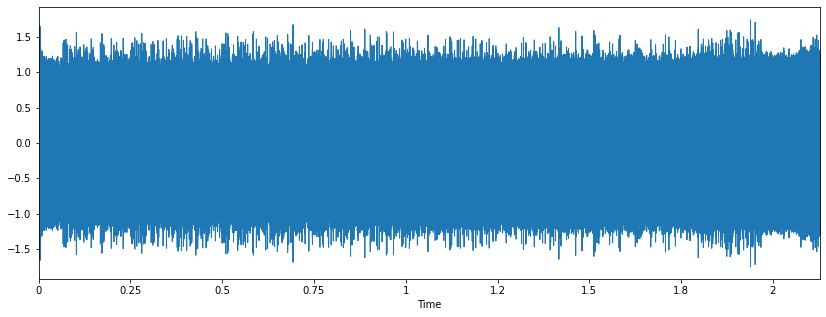

In [56]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

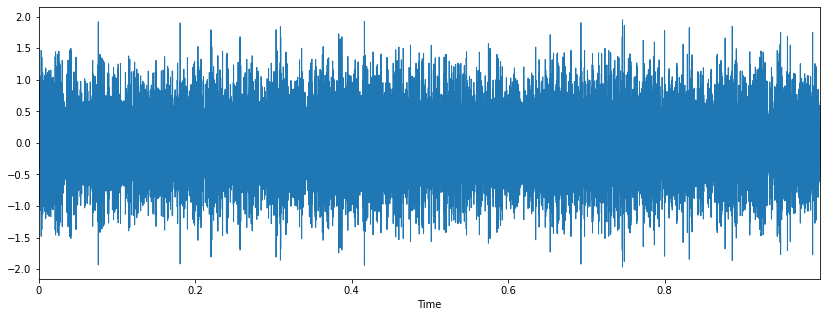

In [57]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y_fast, sr=sr)

In [25]:
ipd.Audio(y_fast, rate=sr)

In [32]:
print(y_fast.size)
print(sr)

22016
22050


In [28]:
ybase, sr2 = lr.load('Base.wav'.format(audio))
print(sr2)

22050


In [35]:
print(ybase)
print(ybase.size)
y_out = ybase

[0.         0.         0.         ... 0.2961777  0.28840333 0.31345367]
88200


In [37]:
import random
init_index = random.randint(0,(ybase.size-y_fast.size-1))
i = 0
while i < y_fast.size:
  y_out[i+init_index]=y_fast[i]+ybase[i+init_index]
  i = i + 1

In [38]:
ipd.Audio(y_out, rate=sr)

In [78]:
def sample_generator(out_path,base_path,scream_path):
  # lee el grito
  audio='arabic6'
  y_scream, sr = lr.load(scream_path.format(audio))
  # obtiene la duracion del grito
  duration = lr.get_duration(y=y_scream, sr=sr)
  # el grito dura 1 segundo
  y_reduce_scream = lr.effects.time_stretch(y_scream, duration)
  # lee el audio base
  y_base, sr = lr.load(base_path.format(audio))
  # obtiene la duracion base
  duration_base = lr.get_duration(y=y_base, sr=sr)
  # obtiene el indice inicial (aleatorio)
  init_index = random.randint(0,(y_base.size-y_reduce_scream.size-1))
  # Inicializa el audio de salida
  y_out = y_base
  # fusiona los audios
  i = 0
  while i < y_reduce_scream.size:
    y_out[i+init_index]=y_reduce_scream[i]+y_base[i+init_index]
    i = i + 1
  # guarda el audio
  lr.output.write_wav(out_path, y_out, sr)
  return (duration_base*init_index/y_base.size)

In [79]:
sample_generator('out/Out.wav','Base.wav','Grito.wav')

2.7298866213151927